<a href="https://colab.research.google.com/github/Uday-Teja-nex/CodEvo-Solutions/blob/main/CodEvo_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas numpy matplotlib scikit-learn opencv-python tensorflow


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:

from google.colab import drive
import zipfile
import os
import shutil

# Install Python libraries: Pandas, Numpy, Matplotlib, Sklearn, OpenCV, TensorFlow.
# These lines are already present in the provided code.

# drive.mount('/content/drive') # This line is also already present

# Path to the ZIP file
zip_path = '/content/drive/MyDrive/archive (1).zip'

# Extract the ZIP file to a directory
extract_dir = '/content/extracted_data'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Define the source and destination directories
source_dir = '/content/extracted_data/dogs_vs_cats/test'
dest_dir = '/content/dogs_vs_cats_data' # Destination folder for training data

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Iterate through the subfolders (cats and dogs) in the source directory
for subfolder in ['cats', 'dogs']:
  subfolder_source = os.path.join(source_dir, subfolder)
  subfolder_dest = os.path.join(dest_dir, subfolder)
  os.makedirs(subfolder_dest, exist_ok=True) # Create the subfolder in the destination

  # Copy files from source to destination
  for filename in os.listdir(subfolder_source):
      source_file = os.path.join(subfolder_source, filename)
      dest_file = os.path.join(subfolder_dest, filename)
      shutil.copy2(source_file, dest_file)  # Use shutil.copy2 to preserve metadata

# Verify the files have been copied correctly
print("Files in cats directory:")
!ls /content/dogs_vs_cats_data/cats | head -n 5 # list first 5 files
print("\nFiles in dogs directory:")
!ls /content/dogs_vs_cats_data/dogs | head -n 5 # list first 5 files

Files in cats directory:
cat.10000.jpg
cat.10001.jpg
cat.10007.jpg
cat.10017.jpg
cat.10021.jpg

Files in dogs directory:
dog.10006.jpg
dog.10010.jpg
dog.10014.jpg
dog.10017.jpg
dog.10021.jpg


Found 5000 images belonging to 2 classes.


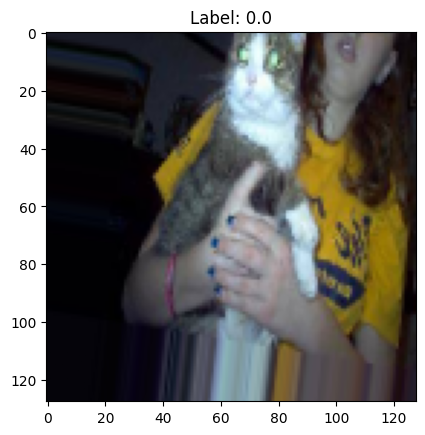

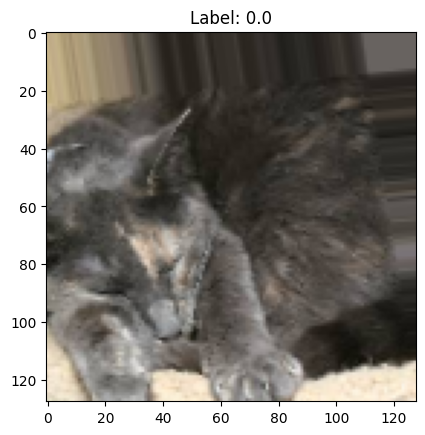

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


# Image data directories
train_data_dir = '/content/dogs_vs_cats_data'

# Image dimensions
img_width, img_height = 128, 128
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shifting
    height_shift_range=0.2,  # Add height shifting
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Assuming binary classification (cats vs. dogs)
)

# Example usage to show the transformations (optional)
for _ in range(2):  # Show a few augmented images
    img, label = next(train_generator)
    plt.imshow(img[0])
    plt.title(f"Label: {label[0]}")
    plt.show()

# Model Building (simple example)
model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Model Training (Example)
# history = model.fit(
#     train_generator,
#     epochs=10,
#     steps_per_epoch=len(train_generator)
# )

In [19]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)  # Use validation_split for train/test split


# Create data generators for training and validation sets
train_generator = datagen.flow_from_directory(
    '/content/dogs_vs_cats_data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Specify 'training' subset
)

validation_generator = datagen.flow_from_directory(
    '/content/dogs_vs_cats_data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Specify 'validation' subset
)


# Model Building with deeper architecture and dropout for regularization
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'), # Added another convolutional layer
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5), # regularization
    keras.layers.Dense(512, activation='relu'), # Increased the number of neurons
    keras.layers.Dense(1, activation='sigmoid')
])

# Use a more advanced optimizer like RMSprop or Adam with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001) # Lower learning rate

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator  # Use validation data during training
)

# Evaluate the model on the test set (optional, but recommended)
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.4941 - loss: 0.6953 - val_accuracy: 0.6380 - val_loss: 0.6616
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6137 - loss: 0.6558 - val_accuracy: 0.6730 - val_loss: 0.6157
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.6734 - loss: 0.6116 - val_accuracy: 0.6850 - val_loss: 0.5775
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6837 - loss: 0.5823 - val_accuracy: 0.7360 - val_loss: 0.5438
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7255 - loss: 0.5443 - val_accuracy: 0.7150 - val_loss: 0.5642
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.7412 - loss: 0.5282 - val_accuracy: 0.7370 - val_loss: 0.5247
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7510 - loss: 0.5070 - val_accuracy: 0.7260 - val_loss: 0.5391
Epoch 8/10
12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


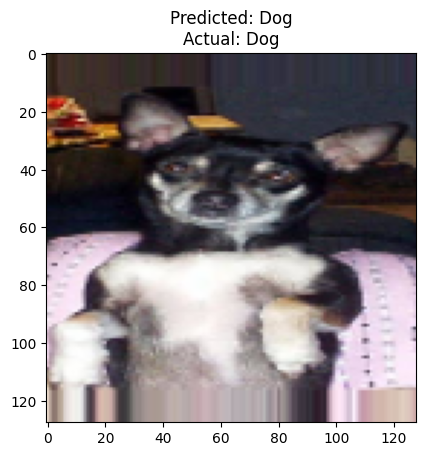

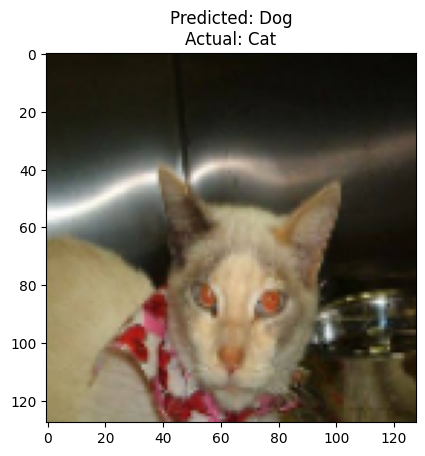

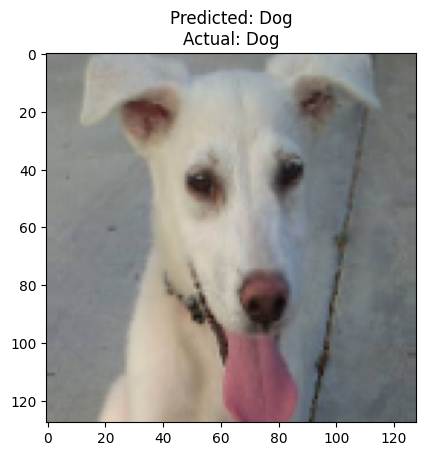

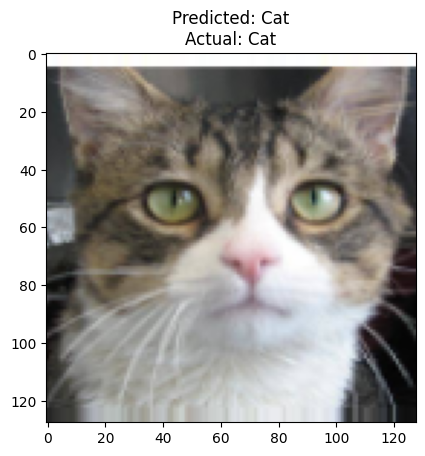

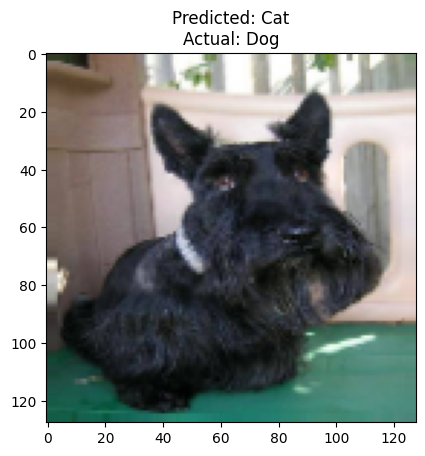

In [24]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' and 'validation_generator' are defined from the previous code

# Function to predict and display results
def predict_and_display(model, generator, num_images=5):
    images, labels = next(generator)  # Get a batch of images and labels
    predictions = model.predict(images)
    predicted_classes = np.round(predictions)

    for i in range(num_images):
        plt.imshow(images[i])
        plt.title(f"Predicted: {'Dog' if predicted_classes[i][0] == 1 else 'Cat'}\nActual: {'Dog' if labels[i] == 1 else 'Cat'}")
        plt.show()

# Call the function to predict and display results
predict_and_display(model, validation_generator)